In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

#### We will use Scikit-Learn make_blobs function to make a training data set with 4 categories as shown in the plot below.

In [3]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [5]:
X_train.shape

(100, 2)

In [8]:
print(f"unique classes {np.unique(y_train)}")

unique classes [0 1 2 3]


In [10]:
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
  
)

model.fit(
    X_train,y_train,
    epochs=20
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 3.1376
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.7537
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8024  
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3171
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3269
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9164
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7765
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7784 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6269 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4601
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4385
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3412
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3440
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3176
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1673
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━

With the model trained, we can see how the model has classified the training data.

  1/184 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step

C:\Users\user\Machine_learning_specialization\Advance_learning_algorithm\week2\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


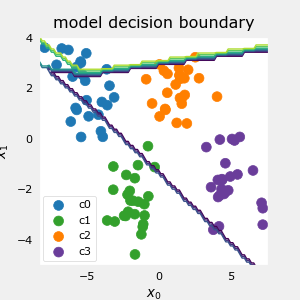

In [18]:
plt_cat_mc(X_train, y_train, model, classes)

In [25]:
single_sample = np.expand_dims(X_train[0], axis=0)
y_predict = model.predict(single_sample)
print(y_predict, y_train[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[ 0.43 -0.64  0.21 -0.12]] 3


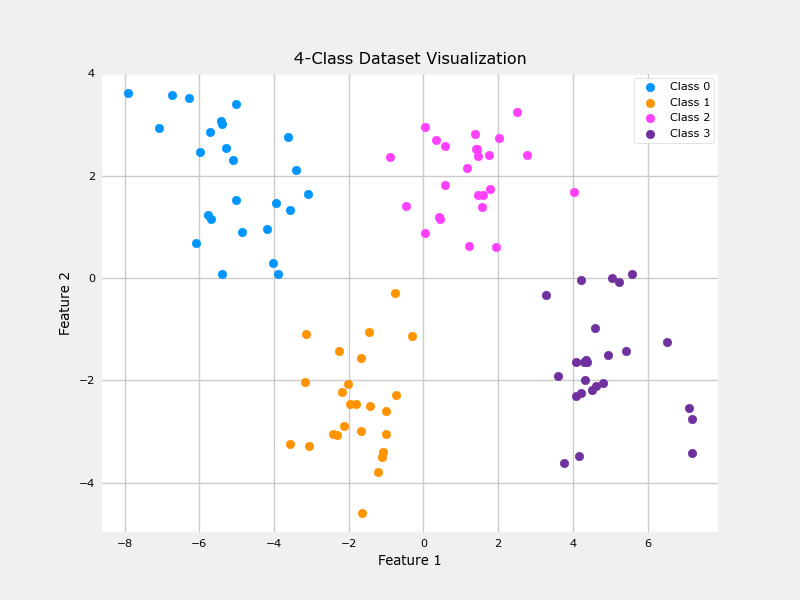

In [29]:
# Convert y_train to a NumPy array (if it's not already)
y_train = np.array(y_train)

# Plot the dataset
plt.figure(figsize=(8, 6))
for class_id in range(classes):
    plt.scatter(
        X_train[y_train == class_id, 0],  # X-coordinates for the given class
        X_train[y_train == class_id, 1],  # Y-coordinates for the given class
        label=f"Class {class_id}"
    )

# Add labels, legend, and title
plt.title("4-Class Dataset Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()